# compare heatmap
## CLI mode

`conf-hicmap-6.yml`

```yaml
trackc:
  - ax: t1
    height: 2.4
    track_type: hicmap
    track_para:
      mat:
        method: extractCisContact
        clr: ./github/seqyuan/trackc_data/examples/HPDE6C7.chr18.mcool::/resolutions/25000
      mapC:
        map_type: tri
        label: upper
  - ax: t2
    height: 2.4
    hspace: 0.1
    track_type: hicmap
    track_para:
      mat2:
        method: extractCisContact
        clr: ./github/seqyuan/trackc_data/examples/BxPC3.chr18.mcool::/resolutions/25000
      mapC:
        map_type: tri
        label: lower
  - ax: t3
    height: 1.5
    hspace: 0.1
    track_type: hicmap
    track_para:
      mat:
        method: extractCisContact
        clr: ./github/seqyuan/trackc_data/examples/HPDE6C7.chr18.mcool::/resolutions/25000
      mat2:
        method: extractCisContact
        clr: ./github/seqyuan/trackc_data/examples/BxPC3.chr18.mcool::/resolutions/25000
      mapC:
        map_type: tri
        height: 70
        maxrange: 170
        label: 
          - Normal
          - Tumor
  - ax: t1
    track_type: scale_track
    track_para:
      scale_adjust: Mb
      tick_pos: top
      ratio2ax: 0.4
      space: 0.05
```

```sh
trackc cli conf-hicmap-6.yml -s 5,1 -r 18:64000000-71000000
```

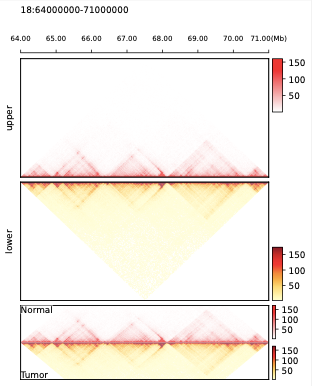

## API mode

In [23]:
import trackc as tc
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

cmap1 = LinearSegmentedColormap.from_list(
    "cmap1", [(0, "white"), (0.03, "w"), (0.4, "r"), (1, "#CF3F35")], N=100
)

no max min range
maxrange: 160.0 minrange: 1.0
no max min range
maxrange: 174.0 minrange: 1.0


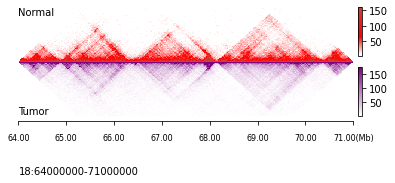

In [24]:
ten = tc.tenon(figsize=(6, 1))
ten.add(pos="bottom", height=2)

region = '18:64000000-71000000'
mat1 = tc.tl.extractCisContact(
    clr='../../../trackc_data/examples/HPDE6C7.chr18.mcool::/resolutions/25000',
    region=region
)
mat2 = tc.tl.extractCisContact(
    clr='../../../trackc_data/examples/BxPC3.chr18.mcool::/resolutions/25000',
    region=region
)

tc.pl.mapC(ax=ten.axs(0), 
           mat=mat1,
           mat2=mat2,
           map_type="tri",
           height=100,
           label=['Normal', 'Tumor'],
           ax_on=False,
           cmap=[cmap1, tc.pa.cmaps.fruitpunch2]
          )

tc.pl.scale_track(
    ax=ten.axs(0),
    region=region,
    scale_adjust= 'Mb',
    tick_pos= 'bottom',
    ratio2ax= 0.5,
    space=0.05
)

#tc.savefig('compare_heatmap.pdf')